In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from cv2 import cv2

In [68]:
def greens_function(x, y, t, x0, y0, t0, form='2d_wave'):
    
    # 2D diffusion
    if form == '2d_diffusion':
        k = 1
        c_x = 20
        c_y = 1
        rho = np.sqrt(c_x * (x - x0) ** 2 + c_y * (y - y0) ** 2)
        t = t - t0
        if t <= 0:
            return 0
        else:
            return 1 / (4 * np.pi * k * t) * np.exp(- rho ** 2 / (4 * k * t))
    
    # 2D wave function
    if form == '2d_wave':
        v = 1
        c_x = 20
        c_y = 1
        rho = np.sqrt(c_x * (x - x0) ** 2 + c_y * (y - y0) ** 2)
        t = t - t0
        if t <= rho / v:
            return 0
        else:
            return 1 / (2 * np.pi * v * np.sqrt(v**2 * t**2 - rho**2))
    
    # 2D Ca Fast
    if form == '2d_ca_fast':
        tau = 1
        rho_e = 60
        v = 500
        t = t - t0
        c_x = 1
        c_y = 1
        rho = np.sqrt(c_x * (x - x0) ** 2 + c_y * (y - y0) ** 2)
        if t <= rho / v:
            return 0
        else:
            return np.exp(-(t - rho / v) / tau) * np.exp(-rho / rho_e)
        
    # 2D Ca Slow
    if form == '2d_ca_slow':
        tau = 5
        rho_e = 8
        v = 1
        t = t - t0
        c_x = 20
        c_y = 1
        rho = np.sqrt(c_x * (x - x0) ** 2 + c_y * (y - y0) ** 2)
        if t <= rho / v:
            return 0
        else:
            return np.exp(-(t - rho / v) / tau) * np.exp(-rho / rho_e)

In [69]:
numx = 30
numy = 60
x0 = numx // 2
y0 = numy // 2
t0 = 0

dt = 0.1
dx = 1
dy = 1

trange = np.arange(0, 50, dt)
xrange = np.arange(0, numx, dx)
yrange = np.arange(0, numy, dy)

data_mat = np.zeros((len(trange), len(xrange), len(yrange)))

## 2D Diffusion (IP$_3$）

$\partial_t - k^2\nabla_{\text{2D}}^2$

$G(\rho,t) = \Theta(t)\left(\frac{1}{4 \pi k t}\right) \mathrm{e}^{-\rho^{2} / 4 k t}$

In [70]:
for k, t in tqdm(enumerate(trange)):
    for i, x in enumerate(xrange):
        for j, y in enumerate(yrange):
            data_mat[k, i, j] = greens_function(x, y, t, x0, y0, t0, '2d_diffusion')

500it [00:09, 52.03it/s]


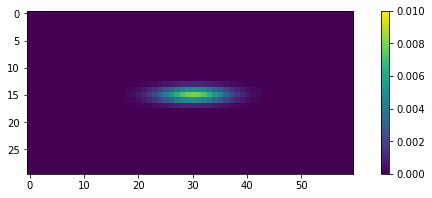

In [71]:
plt.figure(figsize=(10,3))
plt.imshow(data_mat[100], vmin=0, vmax=0.01)
plt.colorbar()
plt.show()

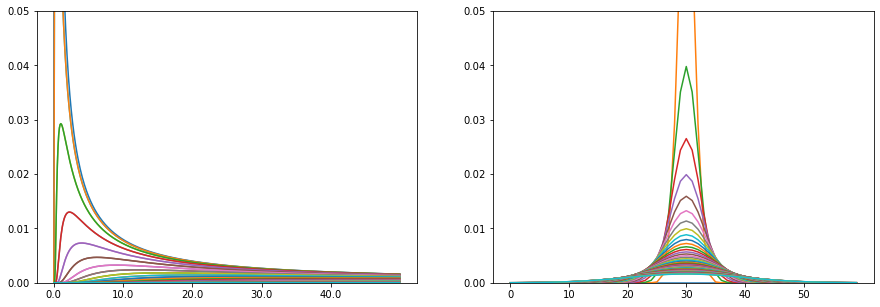

In [72]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.plot(data_mat[:, data_mat.shape[1] // 2, ::])
ax1.set_ylim(0, 0.05)
ax1.set_xticks(range(0, len(trange), 100))
ax1.set_xticklabels(trange[::100])

ax2 = fig.add_subplot(122)
ax2.plot(data_mat[::int(1/dt), data_mat.shape[1] // 2, ::1].T)
ax2.set_ylim(0, 0.05)
ax2.set_xticks(range(0, len(yrange), 10))
ax2.set_xticklabels([int(y) for y in yrange[::10]])
plt.show()

## 2D Wave

$\partial^2_{t} - v^2\nabla_{\text{2D}}^2$

$G(\rho, t) = \frac{1}{2 \pi c \sqrt{c^{2} t^{2}-\rho^{2}}} \Theta(t-\rho / c)$

In [75]:
for k, t in tqdm(enumerate(trange)):
    for i, x in enumerate(xrange):
        for j, y in enumerate(yrange):
            data_mat[k, i, j] = greens_function(x, y, t, x0, y0, t0, '2d_wave')

500it [00:09, 54.84it/s]


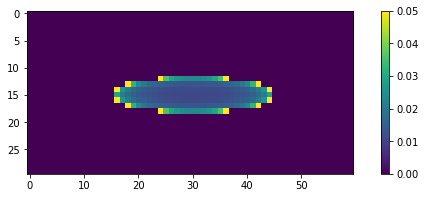

In [76]:
plt.figure(figsize=(10,3))
plt.imshow(data_mat[150], vmin=0, vmax=0.05)
plt.colorbar()
plt.show()

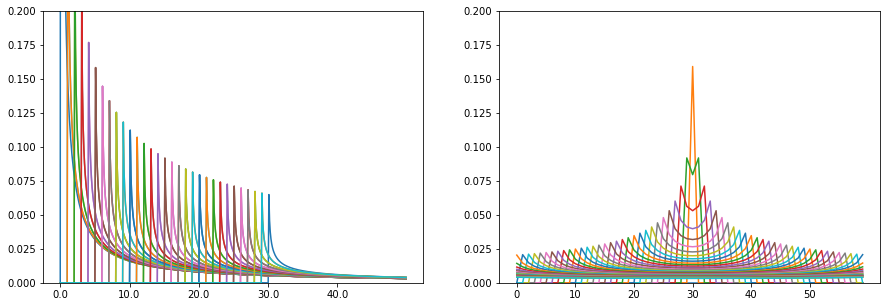

In [77]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.plot(data_mat[:, data_mat.shape[1] // 2, ::])
ax1.set_ylim(0, 0.2)
ax1.set_xticks(range(0, len(trange), 100))
ax1.set_xticklabels(trange[::100])

ax2 = fig.add_subplot(122)
ax2.plot(data_mat[::int(1/dt), data_mat.shape[1] // 2, ::1].T)
ax2.set_ylim(0, 0.2)
ax2.set_xticks(range(0, len(yrange), 10))
ax2.set_xticklabels([int(y) for y in yrange[::10]])
plt.show()

## 2D Ca Fast

$G(\rho, t) = \Theta (t - \frac{\rho}{v}) e^{-\frac{(t-\rho/v)}{\tau}} e^{-\frac{\rho}{\rho_c}}$

In [94]:
dt = 0.001
dx = 1
dy = 1

trange = np.arange(0, 0.2, dt)
xrange = np.arange(0, numx, dx)
yrange = np.arange(0, numy, dy)

data_mat = np.zeros((len(trange), len(xrange), len(yrange)))
for k, t in tqdm(enumerate(trange)):
    for i, x in enumerate(xrange):
        for j, y in enumerate(yrange):
            data_mat[k, i, j] = greens_function(x, y, t, x0, y0, t0, '2d_ca_fast')

200it [00:04, 47.54it/s]


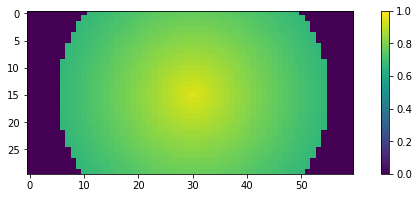

In [95]:
plt.figure(figsize=(10,3))
plt.imshow(data_mat[50], vmin=0, vmax=1)
plt.colorbar()
plt.show()

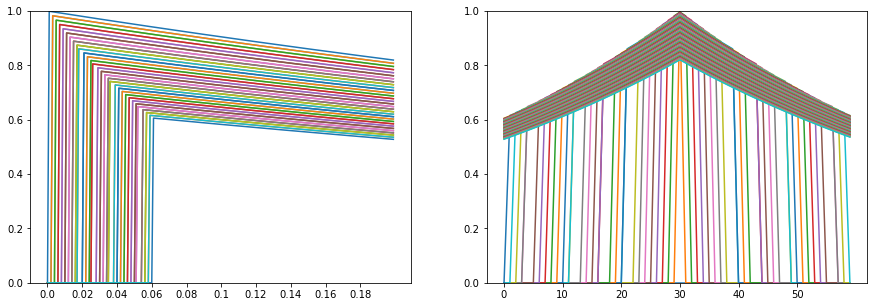

In [82]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.plot(data_mat[:, data_mat.shape[1] // 2, ::])
ax1.set_ylim(0, 1)
ax1.set_xticks(range(0, len(trange), 20))
ax1.set_xticklabels(trange[::20])

ax2 = fig.add_subplot(122)
ax2.plot(data_mat[::2, data_mat.shape[1] // 2, ::1].T)
ax2.set_ylim(0, 1)
ax2.set_xticks(range(0, len(yrange), 10))
ax2.set_xticklabels([int(y) for y in yrange[::10]])
plt.show()

## 2D Ca Slow

$G(\rho, t) = \Theta (t - \frac{\rho}{v}) e^{-\frac{(t - \rho/v)}{\tau}} e^{-\frac{\rho}{\rho_c}}$

In [88]:
dt = 0.1
dx = 1
dy = 1

trange = np.arange(0, 50, dt)
xrange = np.arange(0, numx, dx)
yrange = np.arange(0, numy, dy)

data_mat = np.zeros((len(trange), len(xrange), len(yrange)))

In [89]:
data_mat = np.zeros((len(trange), len(xrange), len(yrange)))
for k, t in tqdm(enumerate(trange)):
    for i, x in enumerate(xrange):
        for j, y in enumerate(yrange):
            data_mat[k, i, j] = greens_function(x, y, t, x0, y0, t0, '2d_ca_slow')

500it [00:07, 70.76it/s]


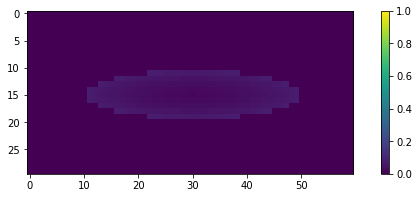

In [90]:
plt.figure(figsize=(10,3))
plt.imshow(data_mat[200], vmin=0, vmax=1)
plt.colorbar()
plt.show()

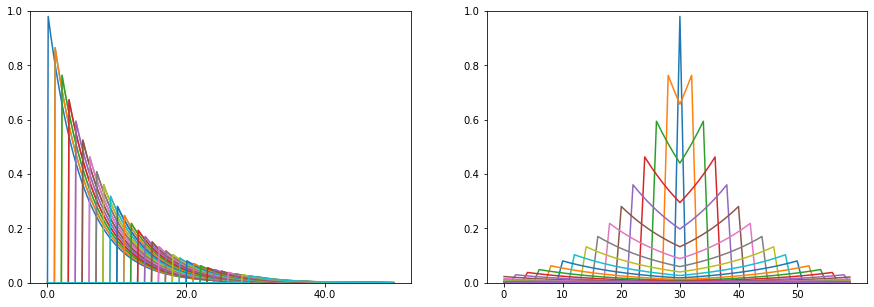

In [91]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.plot(data_mat[:, data_mat.shape[1] // 2, ::])
ax1.set_ylim(0, 1)
ax1.set_xticks(range(0, len(trange), 200))
ax1.set_xticklabels(trange[::200])

ax2 = fig.add_subplot(122)
ax2.plot(data_mat[1::20, data_mat.shape[1] // 2, ::1].T)
ax2.set_ylim(0, 1)
ax2.set_xticks(range(0, len(yrange), 10))
ax2.set_xticklabels([int(y) for y in yrange[::10]])
plt.show()

In [96]:
# Save video

numx = 30
numy = 60
dt = 0.001
dpi = 100

fig = plt.figure()
        
for iframe in range(len(data_mat)):

    plt.clf()
    plt.imshow(np.flip(data_mat[iframe].T, 0),
               vmin=0,
               vmax=1,
               cmap='hot')
    plt.text(1, 5, str(iframe * dt) + 's', color='white', size=15, fontweight='bold')
    plt.colorbar()
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

    plt.savefig('../../results/video/frames/img' + str(iframe) + '.jpg', dpi=dpi, bbox_inches='tight')
    plt.close()

In [97]:
# Make video
fps = 50
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
ny, nx, _ = cv2.imread('../../results/video/frames/img0.jpg').shape
videoWriter = cv2.VideoWriter('../../results/video/greens_function/2d_ca_fast.avi', fourcc, fps, (nx, ny))

for iframe in range(len(data_mat)):
    frame = cv2.imread('../../results/video/frames/img' + str(iframe) + '.jpg')
    videoWriter.write(frame)
videoWriter.release()
cv2.destroyAllWindows()